In [1]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/PlantDoc-Object-Detection/species.zip'
extract_path = '/content/drive/MyDrive/PlantDoc-Object-Detection/species'

In [4]:
# Lister uniquement les dossiers dans le ZIP
print("📁 Dossiers dans le fichier ZIP:")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extraire tous les chemins uniques de dossiers
    folders = set()
    for file in zip_ref.namelist():
        # Obtenir le chemin du dossier (tout sauf le nom du fichier)
        folder = os.path.dirname(file)
        if folder:  # Ignorer les fichiers à la racine
            folders.add(folder)
            # Ajouter aussi tous les dossiers parents
            parts = folder.split('/')
            for i in range(1, len(parts)):
                folders.add('/'.join(parts[:i]))

    # Trier et afficher
    for folder in sorted(folders):
        level = folder.count('/')
        indent = '  ' * level
        folder_name = folder.split('/')[-1] if '/' in folder else folder
        print(f"{indent}📂 {folder_name}/")

print(f"\n📊 Total: {len(folders)} dossiers")


📁 Dossiers dans le fichier ZIP:
📂 species/
  📂 images/
    📂 train/
    📂 val/
  📂 labels/
    📂 train/
    📂 val/

📊 Total: 7 dossiers


In [5]:
# 2. Extraire
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 3. Vérifier ce qui a été extrait
print("📁 Structure extraite:")
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Afficher 5 fichiers par dossier
        print(f'{subindent}{file}')
    if len(files) > 5:
        print(f'{subindent}... et {len(files)-5} autres fichiers')

📁 Structure extraite:
species/
  species_model.ipynb
  species/
    dataset.yaml
    images/
      train/
        IMG_0591.jpg
        Potato-blight-on-leaf_dup118.jpg
        cucurbit-squash_powdery-mildew-2L_dup110.jpg
        0g.jpg
        Corn-Common-Rust-300x225_dup291.jpg
        ... et 8617 autres fichiers
      val/
        11-40580_5.jpg
        2septoria-tomato.jpg
        5816740026_d42ef24413_Phytophthora-Infestans.jpg
        leaf-raspberry-isolated-on-a-white-stock-photography-image-10106222-1625198.jpg
        tomato_virus_04_zoom.jpg
        ... et 231 autres fichiers
    labels/
      train/
        apr-2016_bryan_black-rot-leaf_dup163.txt
        534a_dup284.txt
        87985926-1-56a349f35f9b58b7d0d14d82_dup517.txt
        green-leaf-apple-tree-14300049_dup422.txt
        22+August+2013+010-1_dup256.txt
        ... et 8617 autres fichiers
      val/
        why-are-my-pepper-plants-yellow-yellow-pepper-plants-yellow-leaves-green-veins-pepper-plants-yellow-veins.txt


In [6]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
model = YOLO("yolov8s.pt")

In [7]:
class_weights = {
    0: 1.1338,  # Apple (1000 samples)
    1: 1.1338,  # Bell Pepper (1000 samples)
    2: 1.1338,  # Blueberry (1000 samples)
    3: 1.1338,  # Cherry (1000 samples)
    4: 1.1338,  # Corn (1000 samples)
    5: 1.1338,  # Grape (1000 samples)
    6: 1.1338,  # Peach (1000 samples)
    7: 1.1338,  # Potato (1000 samples)
    8: 1.1338,  # Raspberry (1000 samples)
    9: 1.1338,  # Soyabean (1000 samples)
    10: 1.1338,  # Squash (1000 samples)
    11: 1.1338,  # Strawberry (1000 samples)
    12: 0.4138,  # Tomato (2740 samples)
}

In [9]:
model.train(
    data='/content/drive/MyDrive/PlantDoc-Object-Detection/species/species/dataset.yaml',
    epochs=30,
    imgsz=416,
    batch=8,
    name='species_model_v0',
    patience=20,
    verbose=True,
    augment=True,
    device=0,        # ✅ Force GPU 0
    workers=4,       # ✅ Parallélisation
    amp=True,        # ✅ Mixed Precision (plus rapide)
    cache=True       # ✅ Cache les images en RAM
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PlantDoc-Object-Detection/species/species/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=species_model_v0, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd671a1eb40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

mAP50:    0.85-0.95  ✅ Excellent
mAP50-95: 0.65-0.80  ✅ Très bon
```
→ Le modèle détecte bien ET localise précisément

### **Scénario "détection OK, localisation moyenne" :**
```
mAP50:    0.90  ✅ Excellent
mAP50-95: 0.45  ⚠️ Moyen
```
→ Détecte les maladies mais bounding boxes imprécises
→ **Solution :** Augmenter `imgsz`, vérifier la qualité des labels

### **Scénario problématique :**
```
mAP50:    0.40  ❌ Faible
mAP50-95: 0.20  ❌ Très faible
```
→ Le modèle ne détecte pas bien les maladies
→ **Solutions :** Plus d'epochs, augmentation de données, vérifier le dataset

---

## 🎯 **Objectifs recommandés pour votre projet**

| Métrique | Objectif minimum | Objectif idéal | Signification |
|----------|------------------|----------------|---------------|
| **mAP50-95** | **> 0.50** | **> 0.65** | Métrique principale |
| **mAP50** | **> 0.70** | **> 0.85** | Confirmation détection |
| **Précision** | **> 0.80** | **> 0.90** | Peu de faux positifs |
| **Recall** | **> 0.70** | **> 0.85** | Peu de maladies manquées |

---



In [10]:
results = model.val(data="/content/drive/MyDrive/PlantDoc-Object-Detection/species/species/dataset.yaml")

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 21.3±10.8 MB/s, size: 55.5 KB)
val: Scanning /content/drive/MyDrive/PlantDoc-Object-Detection/species/species/labels/val.cache... 236 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 236/236 333.8Kit/s 0.0s
val: /content/drive/MyDrive/PlantDoc-Object-Detection/species/species/images/val/02.-Rust-2017-207u24s.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 2.7it/s 5.5s
                   all        236        452      0.768      0.774      0.816      0.665
                 Apple         29         34      0.755      0.817      0.869      0.703
           Bell Pepper         17         26      0.665      0.692       0.68      0.553
             Blueberry         11        

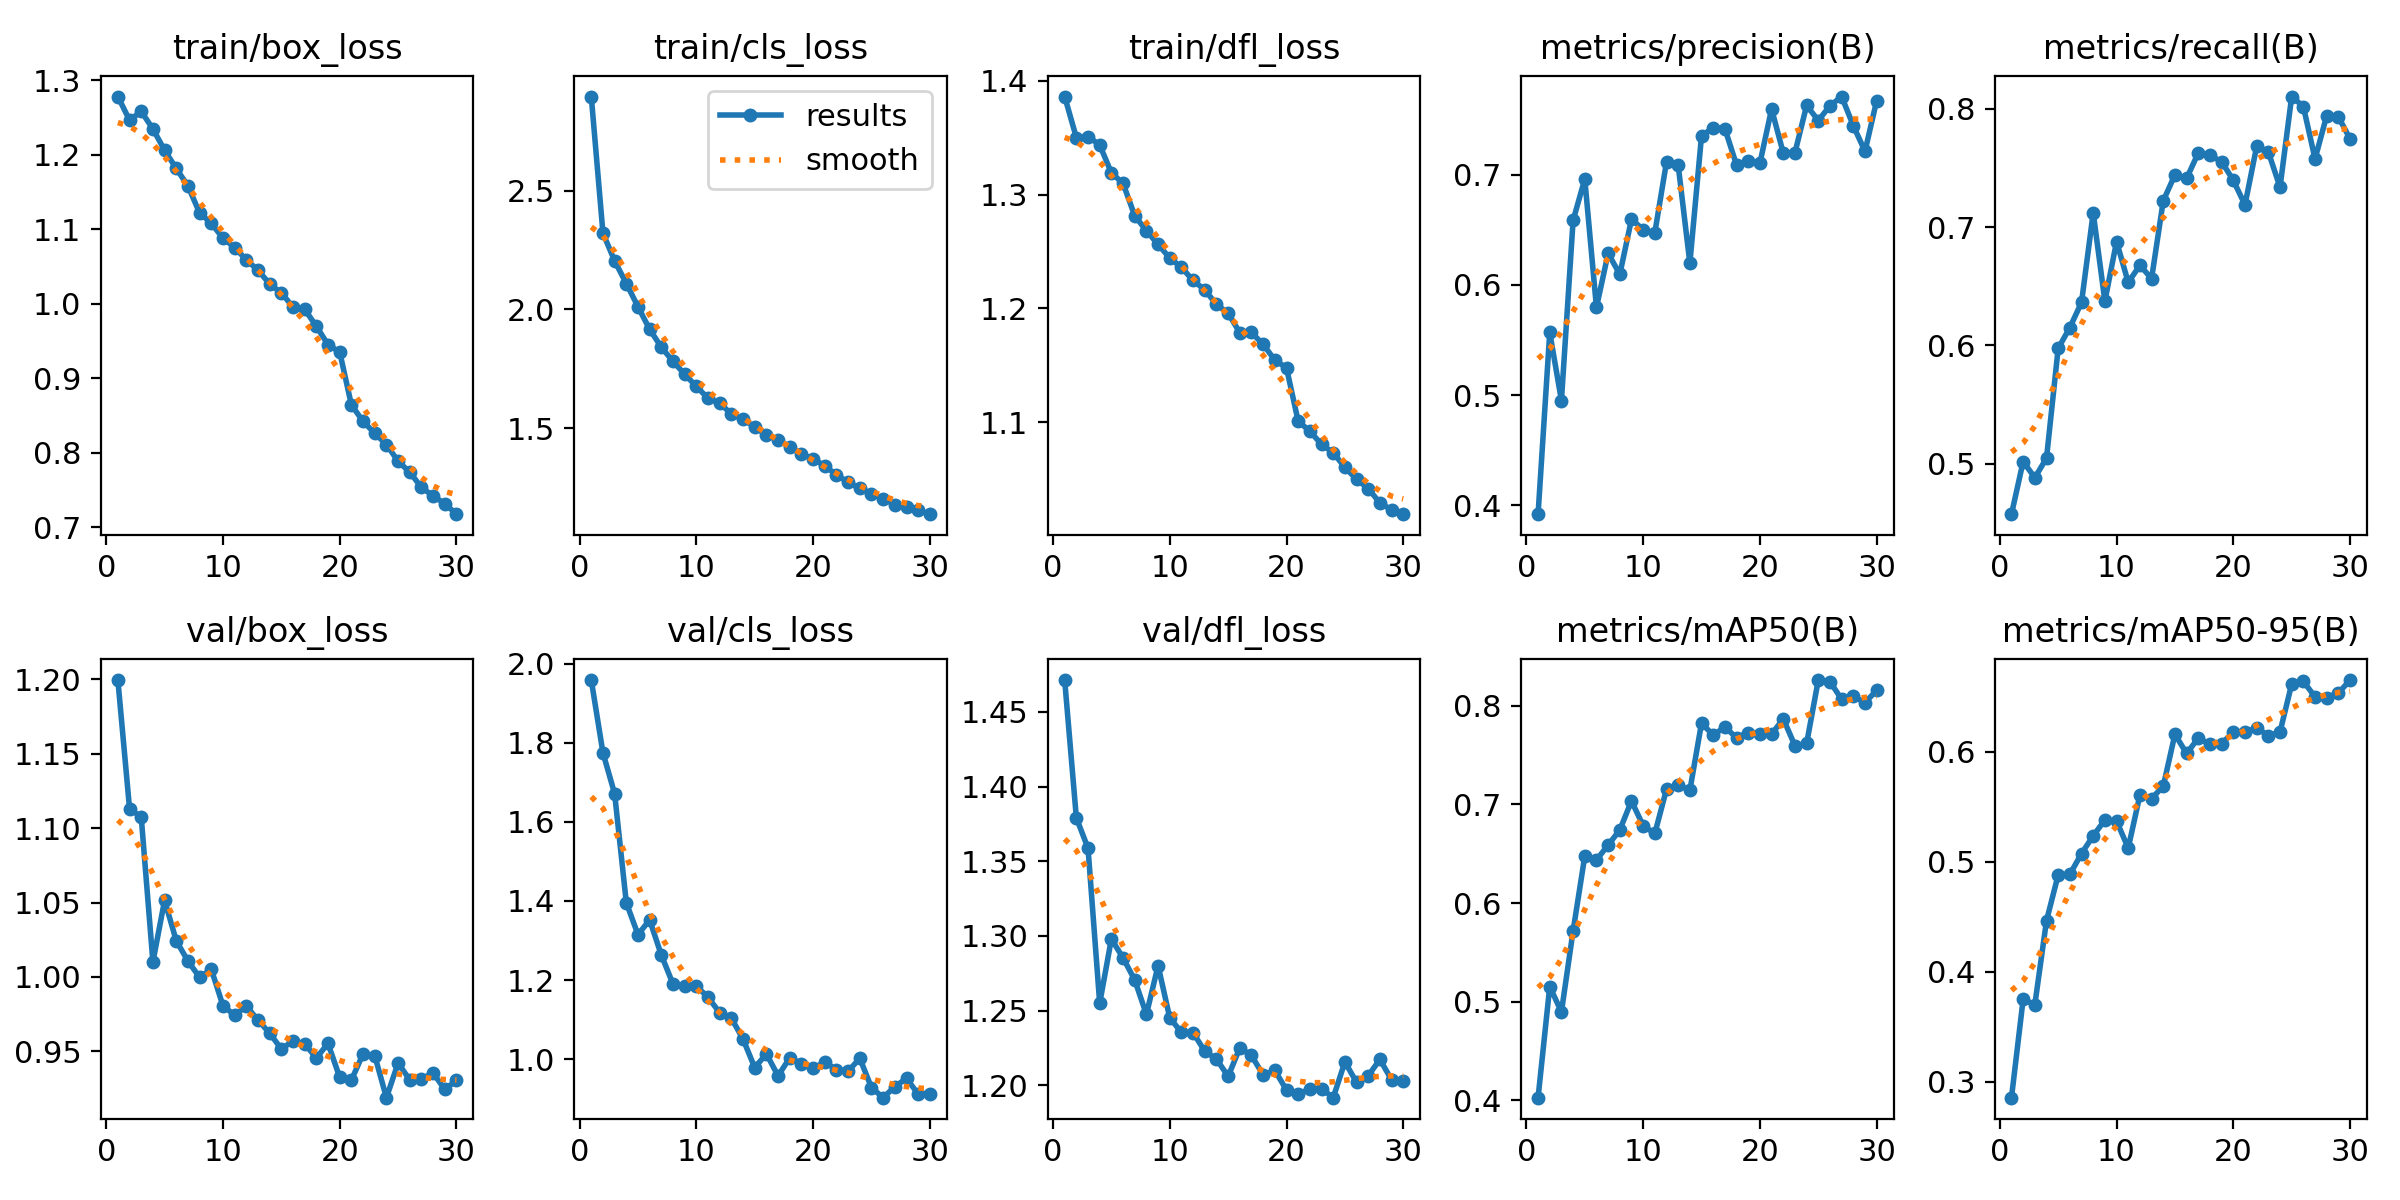

In [11]:
# Voir les courbes d'entraînement
from IPython.display import Image
Image('/content/runs/detect/species_model_v0/results.png')

In [12]:
#Améliorer le Recall avec un seuil plus bas
from ultralytics import YOLO

model = YOLO('/content/runs/detect/species_model_v0/weights/best.pt')

# Tester avec seuil de confiance plus bas
results = model.val(
    data='/content/drive/MyDrive/PlantDoc-Object-Detection/species/species/dataset.yaml',
    conf=0.15,  # ⬇️ Au lieu de 0.25 (défaut)
    iou=0.45
)

print(f"\n🎯 Avec conf=0.15:")
print(f"Recall: {results.box.mr:.3f}")
print(f"Precision: {results.box.mp:.3f}")

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 51.1±44.0 MB/s, size: 139.6 KB)
val: Scanning /content/drive/MyDrive/PlantDoc-Object-Detection/species/species/labels/val.cache... 236 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 236/236 443.5Kit/s 0.0s
val: /content/drive/MyDrive/PlantDoc-Object-Detection/species/species/images/val/02.-Rust-2017-207u24s.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 3.0it/s 5.0s
                   all        236        452      0.775      0.774       0.81      0.679
                 Apple         29         34      0.756      0.818      0.849      0.715
           Bell Pepper         17         26      0.662      0.692      0.694      0.586
             Blueberry         11       

In [ ]:
# Ré-entraîner pour améliorer le Recall

from ultralytics import YOLO

model = YOLO('yolov8s.pt')

model.train(
    data='/content/drive/MyDrive/PlantDoc-Object-Detection/binary/binary/dataset.yaml',
    epochs=50,  # ⬆️ Plus d'epochs
    imgsz=640,  # ⬆️ Meilleure résolution
    batch=24,

    # 🎯 Hyperparamètres pour favoriser Recall
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=15,
    translate=0.1,
    scale=0.5,
    flipud=0.5,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.1,

    # Ajustement des loss pour détecter plus
    cls=0.3,    # ⬇️ Poids classification
    box=7.5,    # ⬆️ Poids localisation
    dfl=1.5,

    name='PlantDoc-Improved-v2',
    patience=25,
    device=0,
    cache='ram',
    amp=True
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=24, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.3, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PlantDoc-Object-Detection/binary/binary/dataset.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=PlantDoc-Improved-v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c7617bcac00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model = YOLO('/content/runs/detect/PlantDoc-Improved-v2/weights/best.pt')

# Tester avec seuil de confiance plus bas
results = model.val(
    data='/content/drive/MyDrive/PlantDoc-Object-Detection/binary/binary/dataset.yaml',
    conf=0.15,
    iou=0.45
)

print(f"\n🎯 Avec conf=0.15:")
print(f"Recall: {results.box.mr:.3f}")
print(f"Precision: {results.box.mp:.3f}")

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.9±0.5 ms, read: 24.8±24.1 MB/s, size: 77.3 KB)
val: Scanning /content/drive/MyDrive/PlantDoc-Object-Detection/binary/binary/labels/val.cache... 236 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 236/236 131.1Kit/s 0.0s
val: /content/drive/MyDrive/PlantDoc-Object-Detection/binary/binary/images/val/02.-Rust-2017-207u24s.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 2.4it/s 6.2s
                   all        236        452       0.82      0.831      0.897      0.704
               healthy         90        181      0.824      0.856      0.916      0.747
               disease        146        271      0.817      0.806      0.878      0.661
Speed: 3.1ms preprocess, 10.4ms inference, 0.

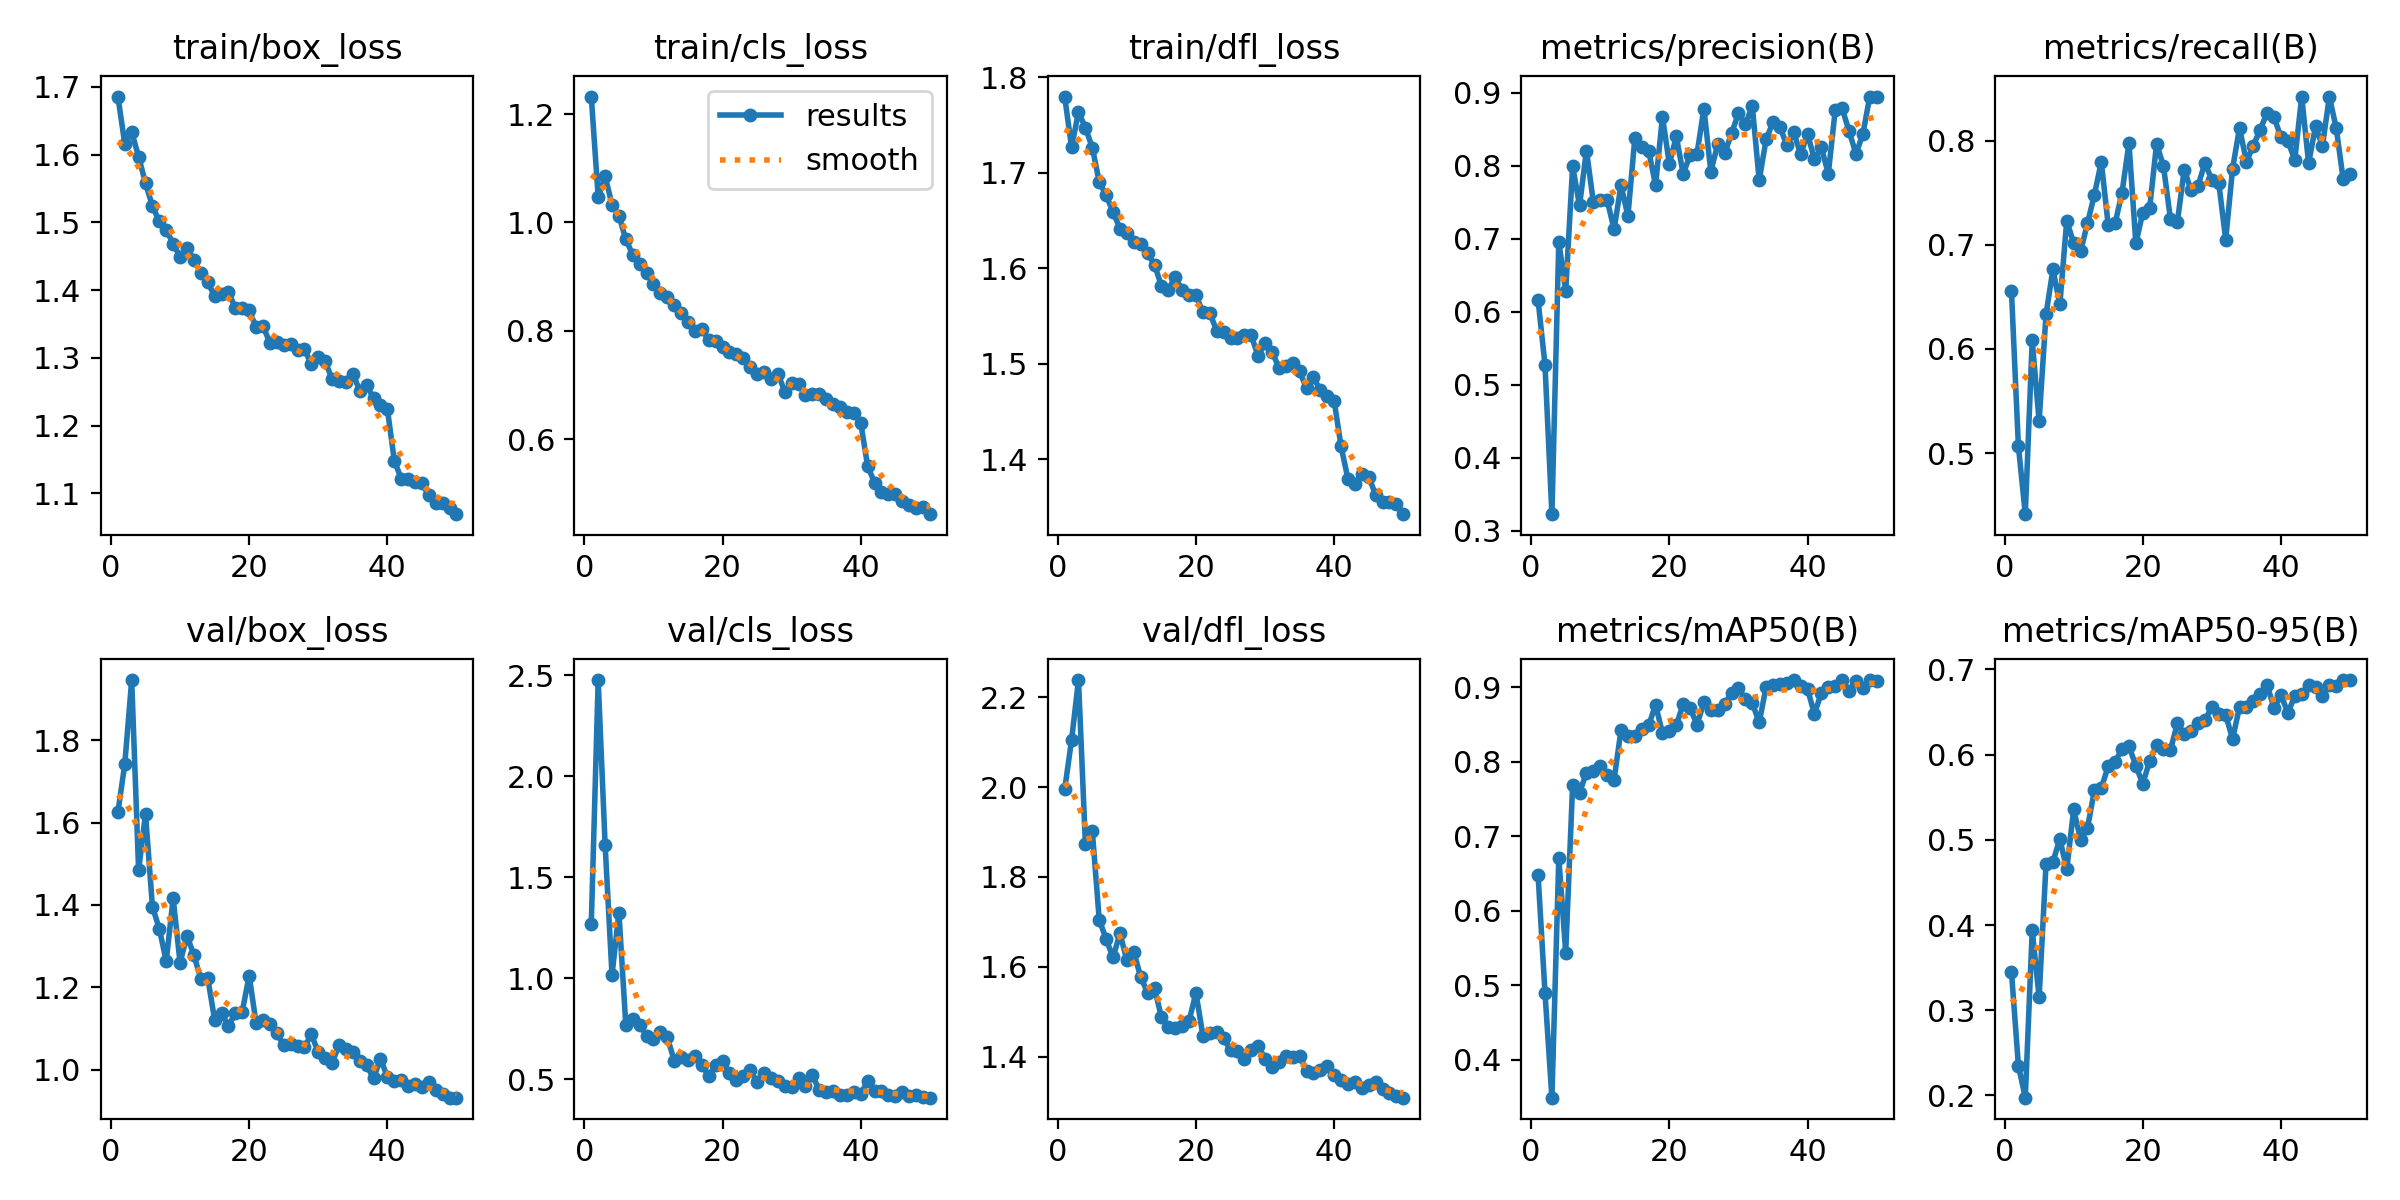

In [ ]:
# Voir les courbes d'entraînement
from IPython.display import Image
Image('/content/runs/detect/PlantDoc-Improved-v2/results.png')